[[ 0.46032725 -0.42964286]
 [-0.47635211 -0.42964286]
 [ 1.39700661  3.62549381]
 [-0.47635211  0.24621325]
 [ 1.39700661 -0.42964286]
 [-0.47635211 -0.42964286]
 [ 0.46032725  3.62549381]
 [ 0.46032725 -0.42964286]
 [ 0.46032725 -0.42964286]
 [ 0.46032725 -0.42964286]
 [ 1.39700661 -0.42964286]
 [ 0.46032725 -0.42964286]
 [ 0.46032725  0.11104203]
 [-0.47635211 -0.42964286]
 [-0.47635211 -0.02412919]
 [-0.47635211  0.92206936]
 [-0.47635211 -0.42964286]
 [-1.41303147 -0.42964286]
 [-0.47635211 -0.42964286]
 [-0.47635211  0.92206936]
 [-1.41303147 -0.42964286]
 [-0.47635211 -0.29447164]
 [ 0.46032725 -0.42964286]
 [-1.41303147 -0.42964286]
 [ 0.46032725 -0.42964286]
 [-0.47635211 -0.42964286]
 [-1.41303147 -0.42964286]
 [-0.47635211 -0.42964286]
 [ 0.46032725 -0.42964286]
 [-0.47635211 -0.42964286]
 [ 0.46032725 -0.42964286]
 [-0.47635211 -0.42964286]
 [-0.47635211 -0.42964286]
 [ 1.39700661 -0.29447164]
 [ 0.46032725 -0.42964286]
 [-0.47635211 -0.42964286]
 [-0.47635211 -0.42964286]
 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Confusion Matrix : 
 [[     0   6222]
 [     0 120618]]
Accuracy :  0.950946073793756


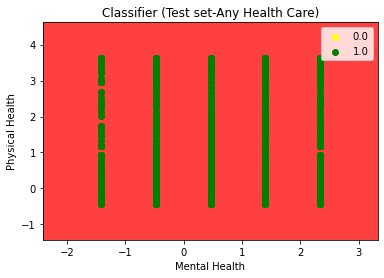

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
dataset = pd.read_csv('C:/Users/asus/Desktop/my patents/pupil vs wmc project/diabetes_012_health_indicators_BRFSS2015.csv')
# input
dataset['Diabetes_012'].replace(to_replace = 2, value =1)

x = dataset.iloc[:,[14,15]].values


# output
y = dataset.iloc[:, 12].values
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.5, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

 
print (xtrain[0:100, :])

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(xtrain, ytrain)



y_pred = classifier.predict(xtest)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('yellow', 'green'))(i), label = j)
	
plt.title('Classifier (Test set-Any Health Care)')
plt.xlabel('Mental Health')
plt.ylabel('Physical Health')
plt.legend()
plt.show()


